## Author : Loka Akash Reddy
### Innomatics Research Labs - Data Science October - 2021
### Tasks - Machine Learning
### Task 1 : KNN Scratch Implementation
###  Kindly follow the instructions given in this document : https://docs.google.com/document/d/19rBDZKVolpYue4-bm6vlOf-sohhKqxfLTHtW7KBEZ5o/edit?usp=sharing
### Dataset Link : https://drive.google.com/file/d/1bWH5tVVpk-FC7YXJOsFkl8b4em6GHuUp/view

### Data Description:
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

### Importing required libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sklearn
import matplotlib as mpl
import plotly.graph_objs as go

from pathlib import Path
from sklearn import svm, preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

**Observations:**

Attributes x,y,z define the shape of the diamond.
Price is the value we are predicting here, that means the y vector.
Attributes Cut, clarity, and Color are categorical in nature, for efficient working we can convert them to numeric values.
Attribute Unnamed:0 is a additional index value given, as we are storing the data in df, we will use the in pandas index, so this can be removed.

### Analyzing the data

In [5]:
df.shape

(53940, 10)

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [9]:
df.describe().T

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no null values in the dataset

In [11]:
for i in df.columns:
    print(i,':',len(df[i].unique()))

carat : 273
cut : 5
color : 7
clarity : 8
depth : 184
table : 127
price : 11602
x : 554
y : 552
z : 375


In [12]:
cat_f =['cut','color','clarity']
num_f = ['carat','depth','table','x','y','z']

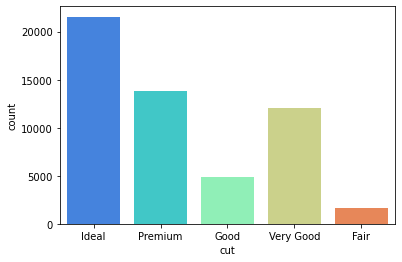

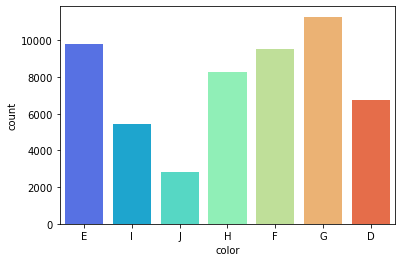

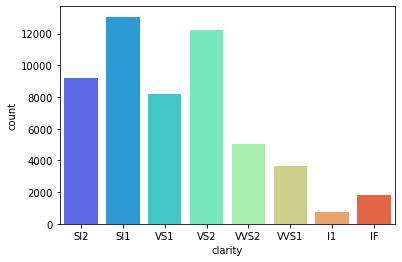

In [13]:
for i in cat_f:
    sns.countplot(df[i], palette='rainbow')
    plt.show()

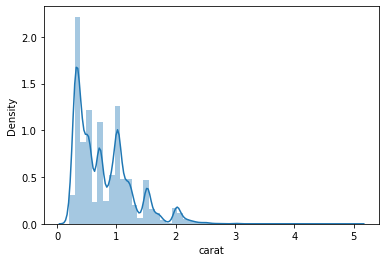

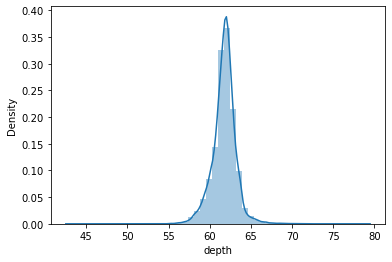

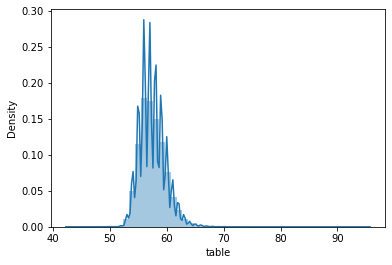

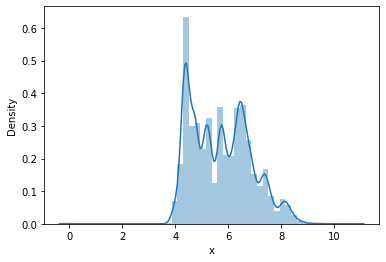

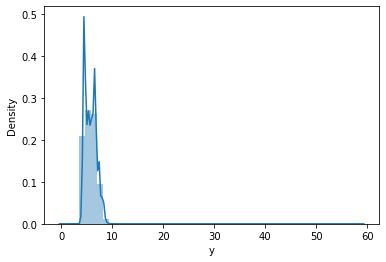

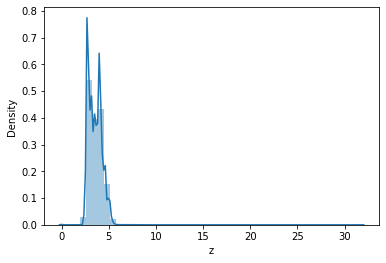

In [14]:
for i in num_f:
    sns.distplot(df[i])
    plt.show()

In [15]:
df.clarity = df.clarity.astype('category')
d1 = dict(enumerate(df.clarity.cat.categories))
d1

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

In [16]:
df.cut = df.cut.astype('category')
d2 = dict(enumerate(df.cut.cat.categories))
d2

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

In [17]:
df.color = df.color.astype('category')
d3 = dict(enumerate(df.color.cat.categories))
d3

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [18]:
df.clarity.cat.reorder_categories(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],inplace=True)
df.cut.cat.reorder_categories(['Fair','Good','Very Good','Premium','Ideal'],inplace=True)
df.color.cat.reorder_categories(['J','I','H','G','F','E','D'],inplace=True)

In [19]:
df.clarity = df.clarity.cat.codes
df.cut = df.cut.cat.codes
df.color = df.color.cat.codes

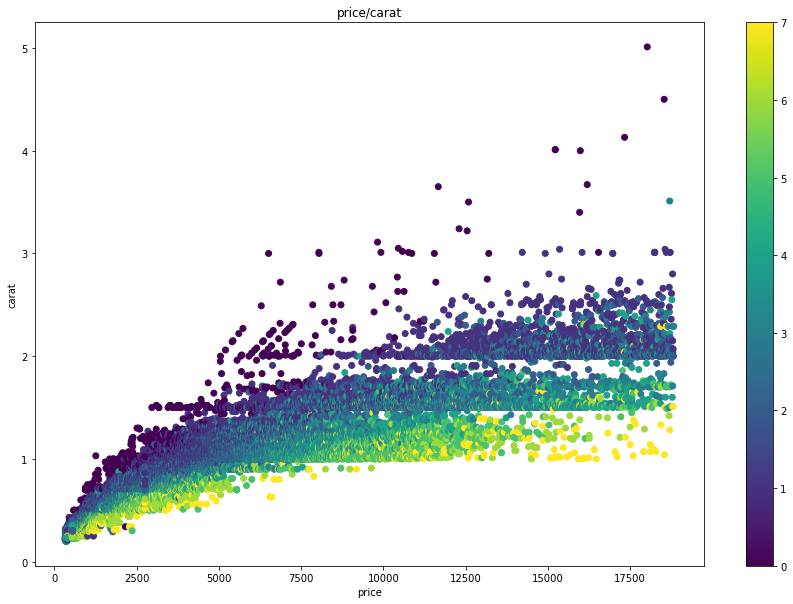

In [20]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.clarity)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

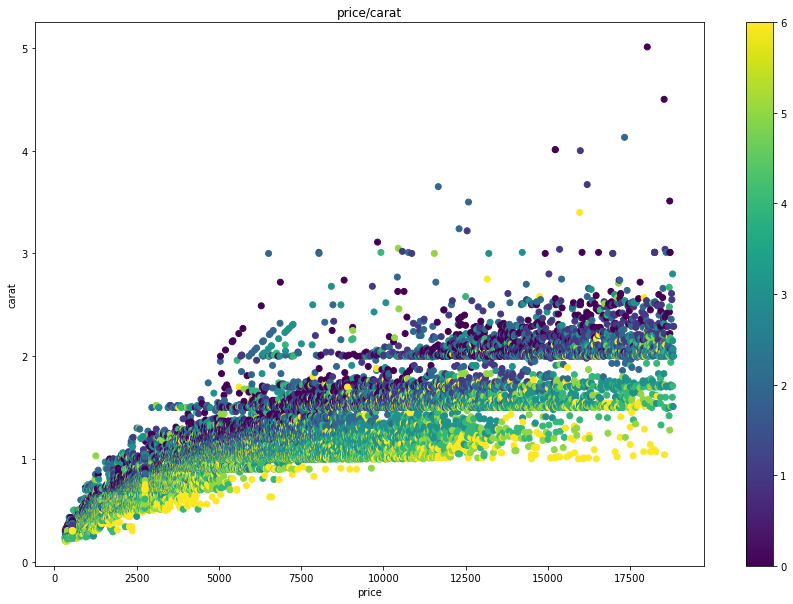

In [21]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.color)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

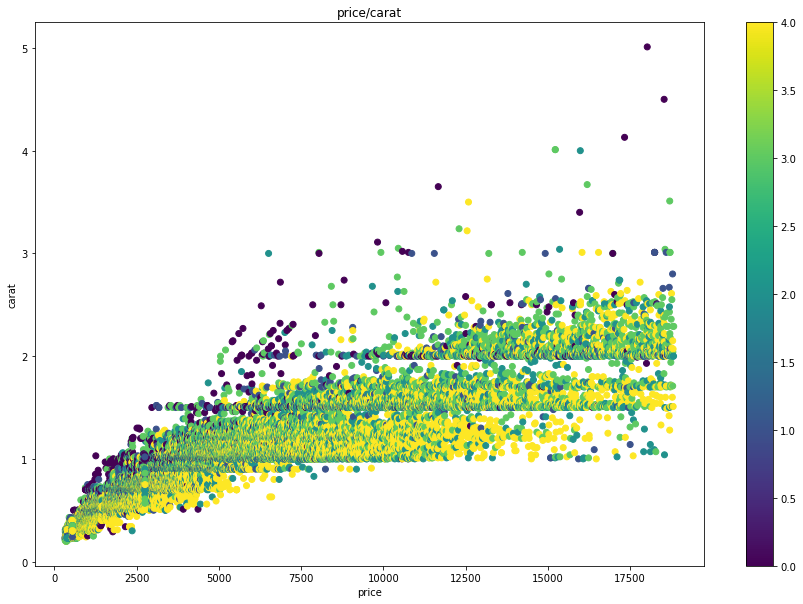

In [22]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.cut)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

Huge diamons are almost never have high clarity, and high clarity still makes huge impact on the price. Same goes with the color. Cut quality also affects the price , making price/carat relationship non-linear.

### Pair Plots

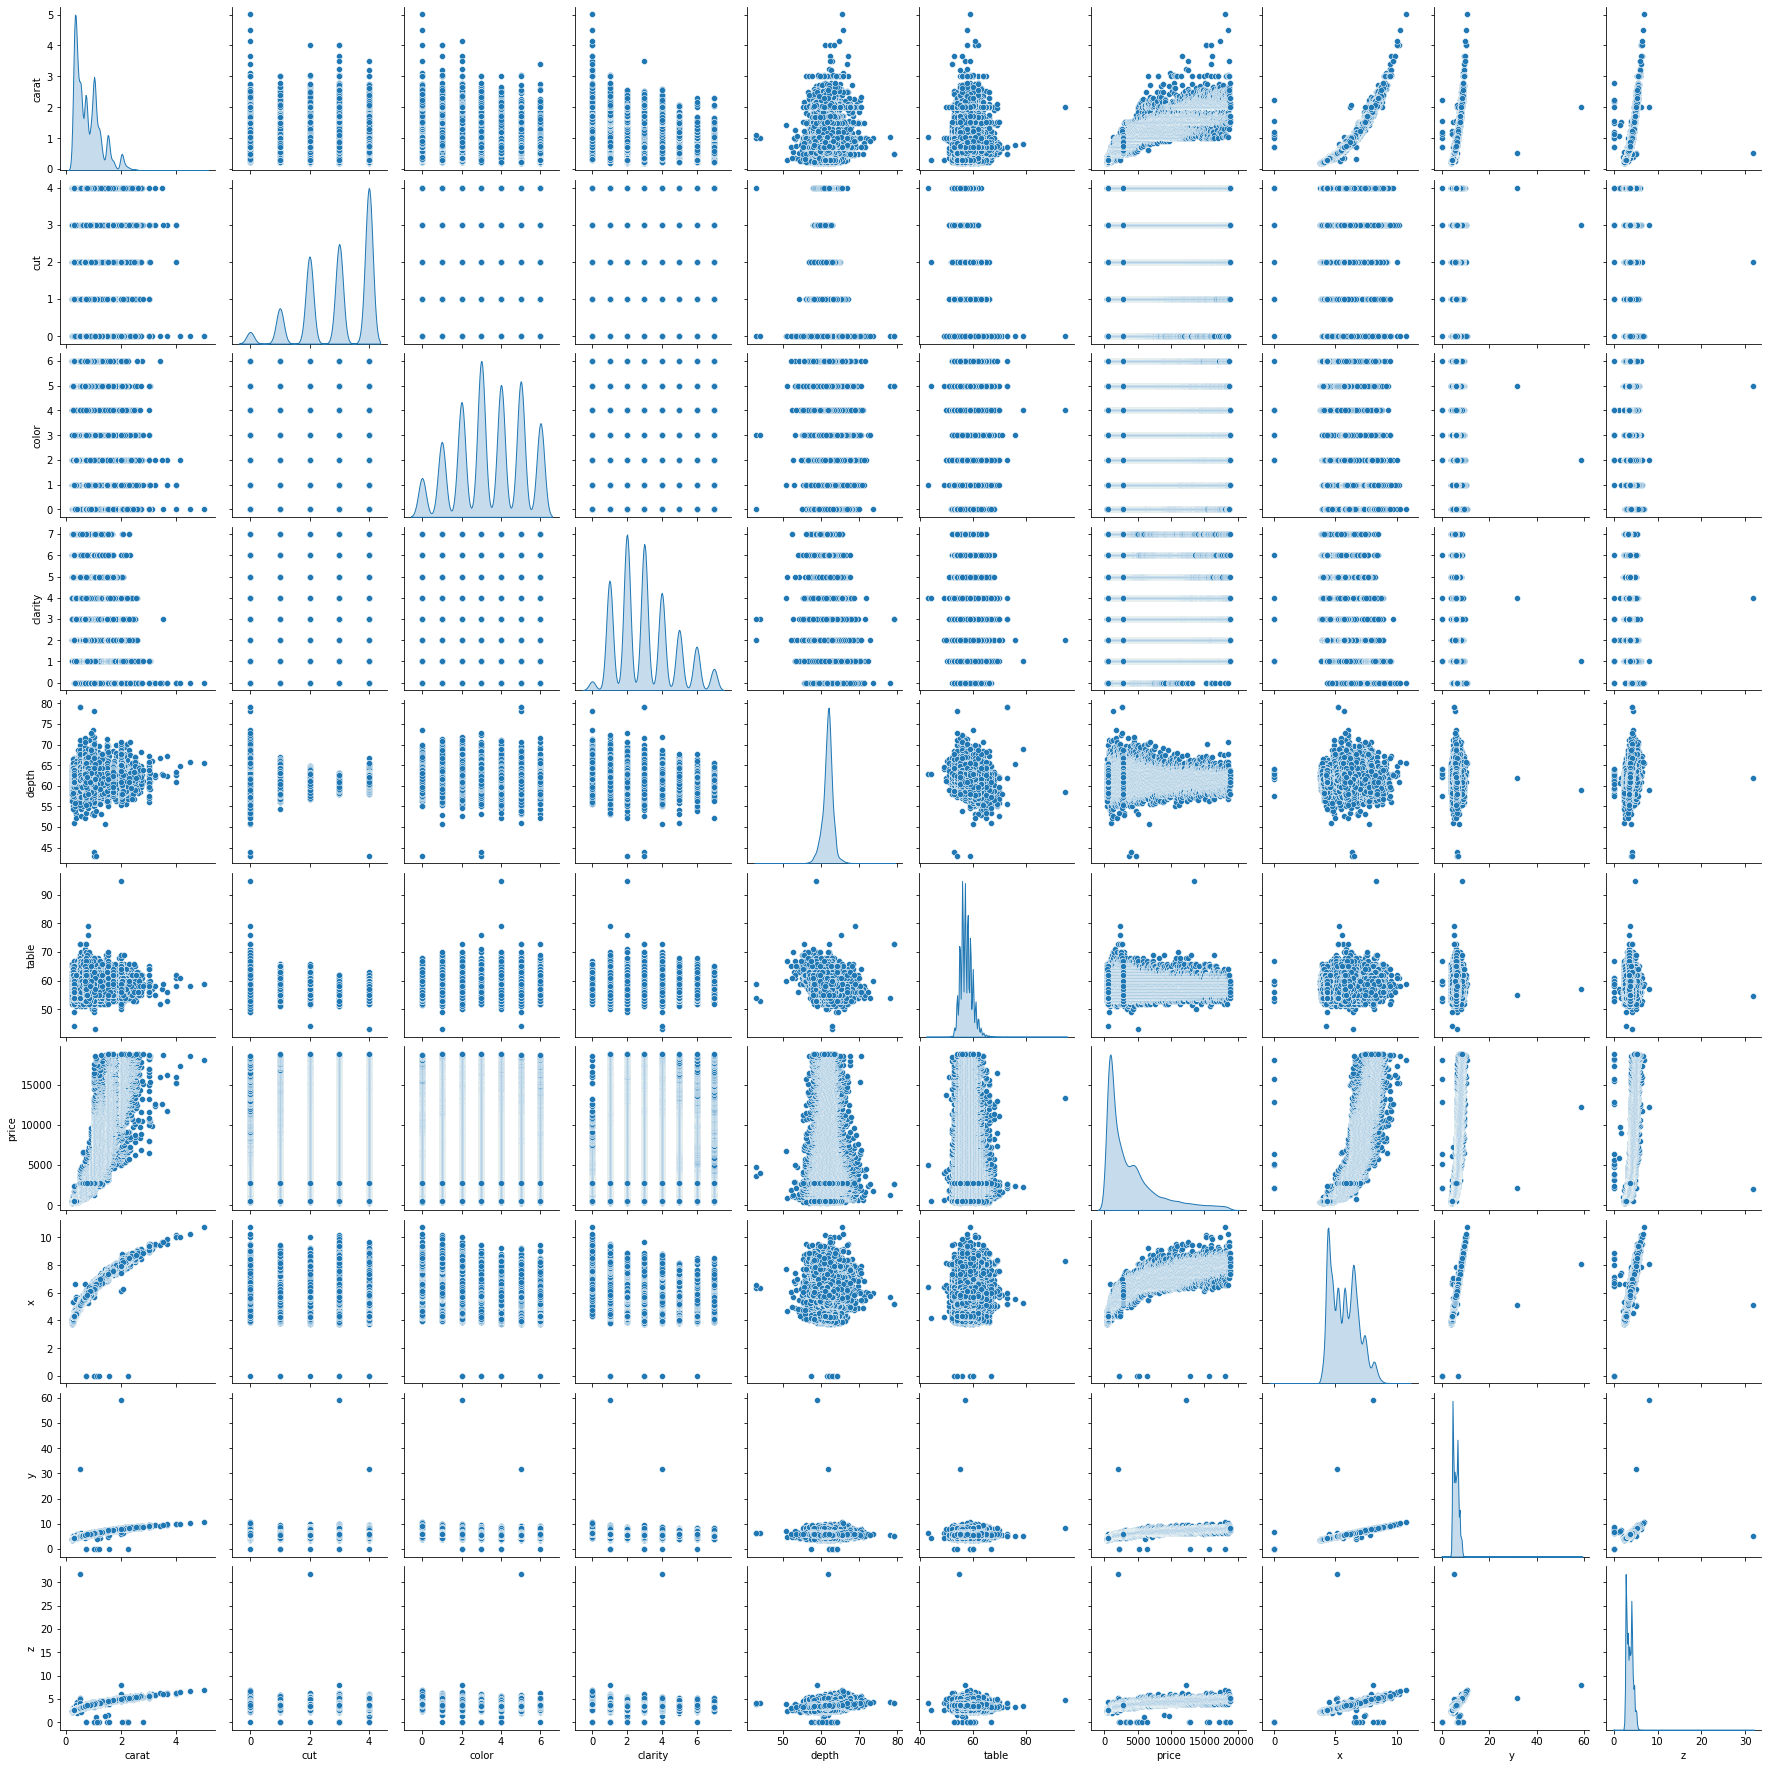

In [23]:
import seaborn as sns
%matplotlib inline 
sns.pairplot(df[ ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] ], 
    diag_kind = 'kde')

<AxesSubplot:>

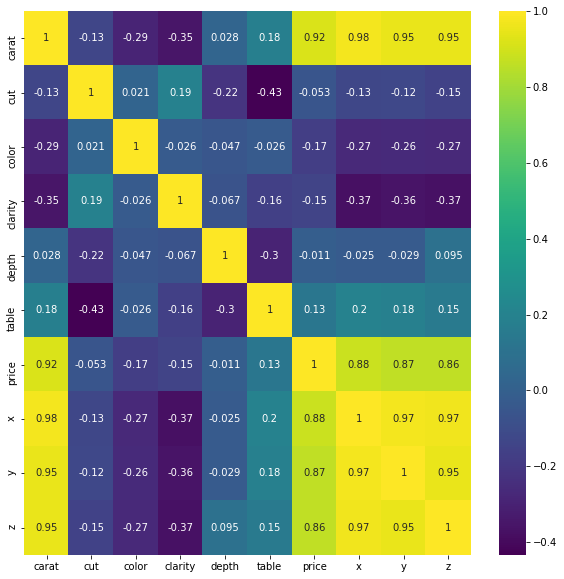

In [24]:
plt.figure(1,figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

[]

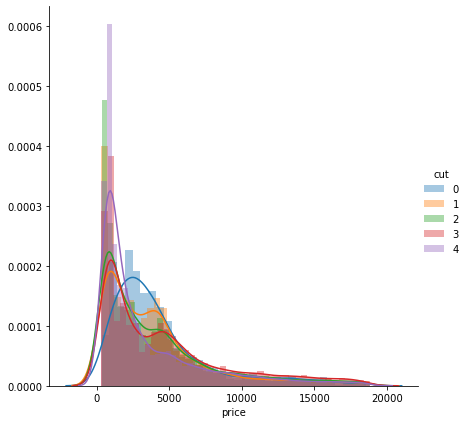

In [25]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

### Preprocessing of Data:
### Categorical data to Numeric Data

In [26]:
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}

In [27]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [28]:
df = sklearn.utils.shuffle(df, random_state = 42)
X = df.drop(['price'], axis = 1).values
X = preprocessing.scale(X)
y = df['price'].values
y = preprocessing.scale(y)

### Label Encoding

In [29]:
df['color'].unique()

array([3, 4, 5, 6, 2, 1, 0], dtype=int8)

In [30]:
df['clarity'].unique()

array([6, 5, 1, 4, 3, 2, 7, 0], dtype=int8)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

df

carat  cut  color  clarity  depth  table  price     x     y     z
1388    0.24    4      3        6   62.1   56.0    559  3.97  4.00  2.47
50052   0.58    2      4        5   60.0   57.0   2201  5.44  5.42  3.26
41645   0.40    4      5        5   62.1   55.0   1238  4.76  4.74  2.95
42377   0.43    3      5        5   60.8   57.0   1304  4.92  4.89  2.98
17244   1.55    4      5        1   62.3   55.0   6901  7.44  7.37  4.61
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
11284   1.05    2      1        3   62.4   59.0   4975  6.48  6.51  4.05
44732   0.47    4      6        4   61.0   55.0   1617  5.03  5.01  3.06
38158   0.33    2      4        7   60.3   58.0   1014  4.49  4.46  2.70
860     0.90    3      0        2   62.8   59.0   2871  6.13  6.03  3.82
15795   1.14    3      4        2   60.4   58.0   6320  6.82  6.79  4.11

[53940 rows x 10 columns]

One Hot Encoding:

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

For each unique variable, a separate column will be generated. 1 and 0 will be filled depending on the fact whether that variable is there in the original column at that place or not.

In [33]:
df = pd.read_csv('diamonds.csv')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [34]:
dummies = pd.get_dummies(df['color'])
dummies

D  E  F  G  H  I  J
0      0  1  0  0  0  0  0
1      0  1  0  0  0  0  0
2      0  1  0  0  0  0  0
3      0  0  0  0  0  1  0
4      0  0  0  0  0  0  1
...   .. .. .. .. .. .. ..
53935  1  0  0  0  0  0  0
53936  1  0  0  0  0  0  0
53937  1  0  0  0  0  0  0
53938  0  0  0  0  1  0  0
53939  1  0  0  0  0  0  0

[53940 rows x 7 columns]

In [35]:
df = pd.concat([df, dummies], axis = 1)
df

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       D  E  F  G  H  I  J  
0      0  1  0  0  0  0  0  
1      0  1  0  0  0  0  0  
2      0  1  0  0  0  0  0  
3      0  0  0  0  0  1  0  
4      0  0  0  0  0  0  1  
...   .. .. .. .. .. .. ..  
53935  1  0  0  0  0  0  0  
53936  1  0  0  0  0  0  0  
53937  1  0  0  0  0  0  0  
53938  0  0  0  0  1  0  0  
53939  1  0  0  0  0  0  0  

[53940 rows x 17 columns]

In [36]:
df.drop(['color'], axis = 1, inplace = True)

In [37]:
df

carat        cut clarity  depth  table  price     x     y     z  D  E  \
0       0.23      Ideal     SI2   61.5   55.0    326  3.95  3.98  2.43  0  1   
1       0.21    Premium     SI1   59.8   61.0    326  3.89  3.84  2.31  0  1   
2       0.23       Good     VS1   56.9   65.0    327  4.05  4.07  2.31  0  1   
3       0.29    Premium     VS2   62.4   58.0    334  4.20  4.23  2.63  0  0   
4       0.31       Good     SI2   63.3   58.0    335  4.34  4.35  2.75  0  0   
...      ...        ...     ...    ...    ...    ...   ...   ...   ... .. ..   
53935   0.72      Ideal     SI1   60.8   57.0   2757  5.75  5.76  3.50  1  0   
53936   0.72       Good     SI1   63.1   55.0   2757  5.69  5.75  3.61  1  0   
53937   0.70  Very Good     SI1   62.8   60.0   2757  5.66  5.68  3.56  1  0   
53938   0.86    Premium     SI2   61.0   58.0   2757  6.15  6.12  3.74  0  0   
53939   0.75      Ideal     SI2   62.2   55.0   2757  5.83  5.87  3.64  1  0   

       F  G  H  I  J  
0      0  0  0  0  0  
1      0  0  0  0  0  
2      0  0  0  0  0  
3      0  0  0  1  0  
4      0  0  0  0  1  
...   .. .. .. .. ..  
53935  0  0  0  0  0  
53936  0  0  0  0  0  
53937  0  0  0  0  0  
53938  0  0  1  0  0  
53939  0  0  0  0  0  

[53940 rows x 16 columns]

### Data modeling:

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

In [39]:
# Taking 75% data as test and 25% as training data. 
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.75)

In [40]:
# Taking odd integers as K vales so that majority rule can be applied easily. 
neighbors = np.arange(1, 20, 2)
scores = []

In [41]:
for k in neighbors:   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_tr, y_tr)
    score = cross_val_score(clf, X_tr, y_tr, cv = 10)
    scores.append(score.mean())

In [42]:
mse = [1-x for x in scores]

In [43]:
trace0 = go.Scatter(
    y = mse,
    x = neighbors, # np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'CV Error',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [44]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

The K value with least Error will correspond to the best on, as we can see the graph is having a global minima.

In [45]:
optimal_k = neighbors[mse.index(min(mse))]
print("Optimal K: ", optimal_k)

Optimal K:  9


In [46]:
# Training the model on Optimal K.
clf_optimal = KNeighborsRegressor(n_neighbors = optimal_k)
clf_optimal.fit(X_tr, y_tr)
y_pred = clf_optimal.predict(X_test)
acc = clf_optimal.score(X_test, y_test)
print("Accuracy: ", acc*100)
print("RMS Error: ", mean_squared_error(y_test, y_pred))

Accuracy:  96.03905452180163
RMS Error:  0.03983079295764514


In [47]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized Price')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

## Thank you